# Optimization using SciPy

### Simple Optimization (Minimum and Maximum)

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np

- Define a function: $f(x) = x^2+10\sin(x)$

In [3]:
def f(x):
    return x**2 + 10*np.sin(x)

In [4]:
x = np.linspace(-10, 10, 51)
x

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

In [5]:
y = f(x)
y

array([105.44021111,  93.90326781,  82.41110086,  71.59082807,
        62.01401092,  54.10641753,  48.08080328,  43.90332136,
        41.29886649,  39.79450795,  38.79415498,  37.67266638,
        35.87454656,  33.00164609,  28.87602074,  23.56802495,
        17.38520443,  10.82374143,   4.4901185 ,  -0.99463181,
        -5.09297427,  -7.43573603,  -7.88039086,  -6.53356091,
        -3.73418342,   0.        ,   4.05418342,   7.81356091,
        10.76039086,  12.55573603,  13.09297427,  12.51463181,
        11.1898815 ,   9.65625857,   8.53479557,   8.43197505,
         9.84397926,  13.07835391,  18.20545344,  25.04733362,
        33.20584502,  42.12549205,  51.18113351,  59.77667864,
        67.43919672,  73.89358247,  79.10598908,  83.28917193,
        86.86889914,  90.41673219,  94.55978889])

<IPython.core.display.Javascript object>


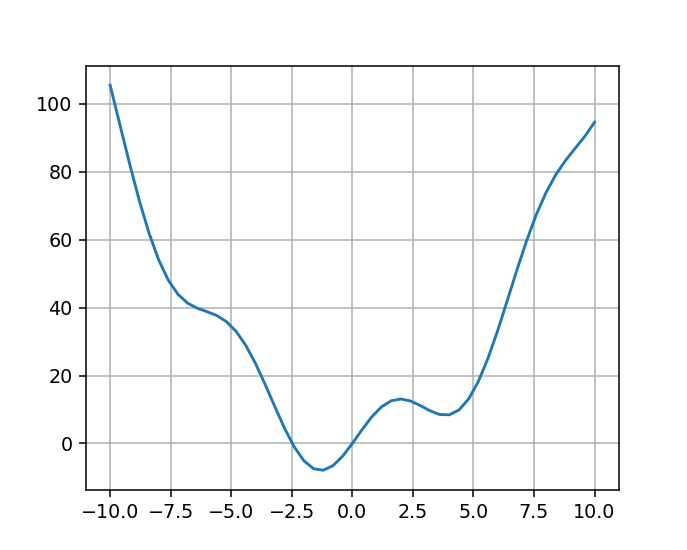

In [6]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.grid('on')
plt.show()

In [7]:
import scipy.optimize as opt

- Find a minimum of the function `f(x)` using the BFGS (Broyden–Fletcher–Goldfarb–Shanno) method, starting from a initial point `x0 = 0`.

In [8]:
x0 = 0 
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    opt.fmin_bfgs(f,  # Objective function to be minimized.
              x0=x0,  # Initial guess.
              maxiter=2000,  # Maximum number of iterations to perform.
              full_output=True)  # Return fopt, func_calls, grad_calls, and warnflag in addition to xopt.

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 6


In [9]:
xopt

array([-1.30644012])

In [10]:
fopt

-7.945823375615215

<IPython.core.display.Javascript object>


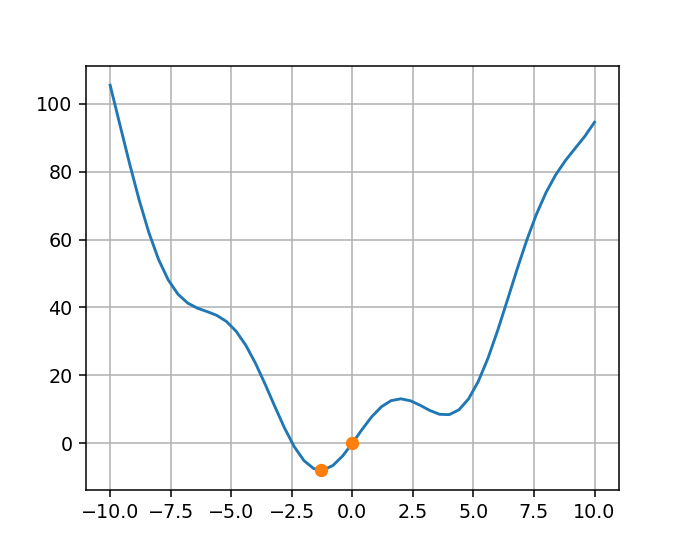

In [11]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt[0]], [f(x0), fopt], 'o')  # Revised 11/25/2023
plt.grid(True)
plt.show()

- What if we start from x0 = 6?

In [12]:
x0 = 6 
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    opt.fmin_bfgs(f,  # Objective function to be minimized.
              x0=x0,  # Initial guess.
              maxiter=2000,  # Maximum number of iterations to perform.
              full_output=True)  # Return fopt, func_calls, grad_calls, and warnflag in addition to xopt.

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 7
         Function evaluations: 16
         Gradient evaluations: 8


In [13]:
xopt

array([3.83746712])

In [14]:
fopt

8.31558557947746

<IPython.core.display.Javascript object>


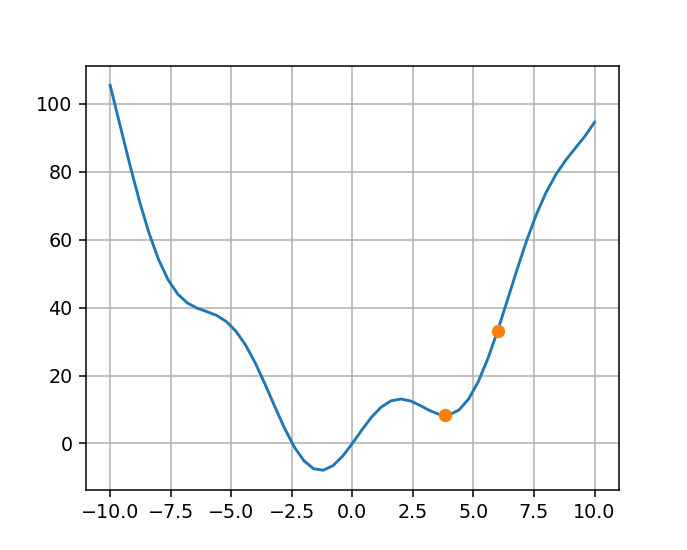

In [15]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt[0]], [f(x0), fopt], 'o')  # Revised 11/25/2023
plt.grid(True)
plt.show()

- Find the global minimum using the basinhopping method.

In [16]:
res = \
    opt.basinhopping(f, 
                     x0=x0, 
                     T=1,  # The “temperature” parameter
                     stepsize=2)  # Initial step size
res

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -7.9458233756152845
                          x: [-1.306e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 1254
                       njev: 627
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -7.9458233756152845
                                    x: [-1.306e+00]
                                  nit: 4
                                  jac: [ 2.384e-07]
                             hess_inv: [[ 8.582e-02]]
                                 nfev: 10
                                 njev: 5

<IPython.core.display.Javascript object>


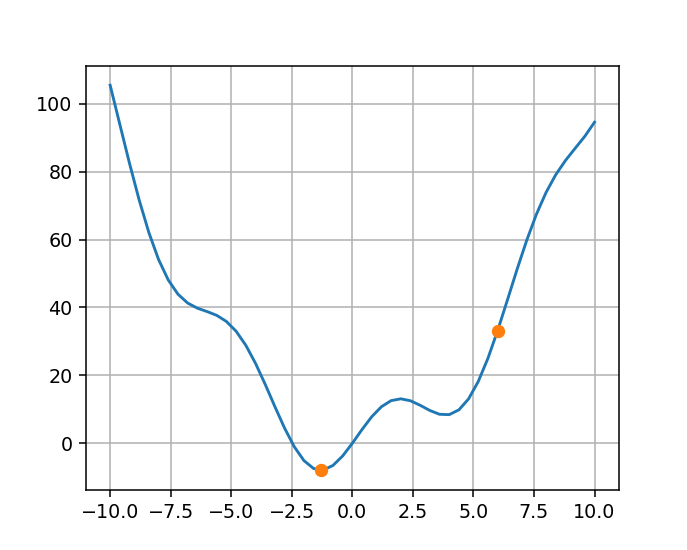

In [17]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, res.x[0]], [f(x0), res.fun], 'o')  # Revised 11/25/2023
plt.grid(True)
plt.show()

### Solving Equations

- Solve the equation $f(x)=x^2+10\sin(x)=0$.

In [18]:
x0 = 1
xopt = opt.fsolve(f, x0)  # Find a root with initial guess x0
xopt

array([0.])

<IPython.core.display.Javascript object>


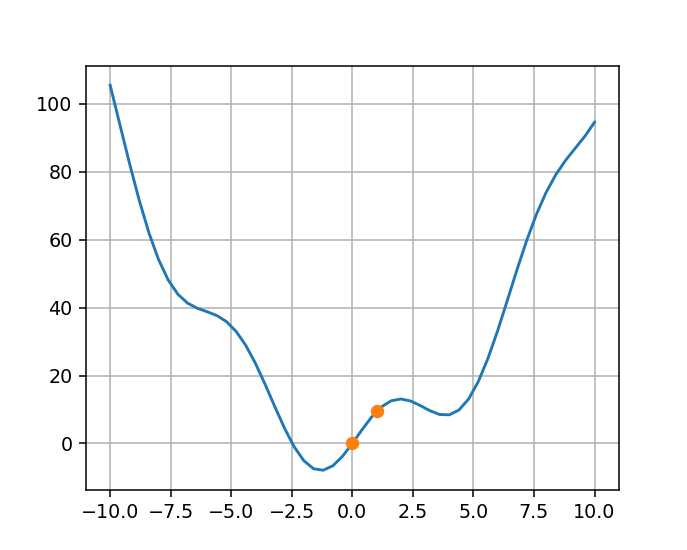

In [19]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt[0]], [f(x0), f(xopt)[0]], 'o')  # Revised 11/25/2023
plt.grid(True)
plt.show()

In [20]:
x0 = -3
xopt = opt.fsolve(f, x0)  # Find a root with initial guess x0
xopt

array([-2.47948183])

<IPython.core.display.Javascript object>


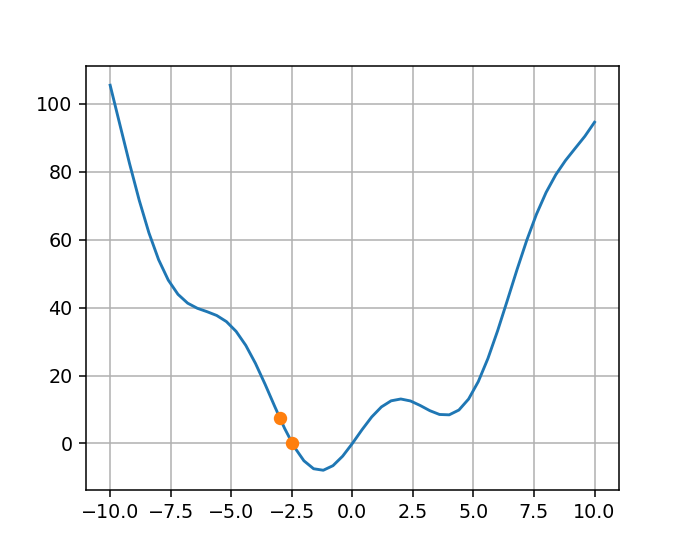

In [21]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y)
plt.plot([x0, xopt[0]], [f(x0), f(xopt)[0]], 'o')  # Revised 11/25/2023
plt.grid(True)
plt.show()

### Curve Fitting

- Curve fitting is a procedure for finding the best-fitting curve to a given set of points by minimizing the sum of the squares of the offsets ("the residuals") of the points from the curve.
<img src="images/curve_fitting_1.png" alt="Curve Fitting 1" style="width: 150px;"/>
<img src="images/curve_fitting_2.png" alt="Curve Fitting 2" style="width: 150px;"/>
<img src="images/curve_fitting_3.png" alt="Curve Fitting 3" style="width: 150px;"/>

In [22]:
x

array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
        -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
        -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
         0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
         4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
         8. ,   8.4,   8.8,   9.2,   9.6,  10. ])

In [23]:
y

array([105.44021111,  93.90326781,  82.41110086,  71.59082807,
        62.01401092,  54.10641753,  48.08080328,  43.90332136,
        41.29886649,  39.79450795,  38.79415498,  37.67266638,
        35.87454656,  33.00164609,  28.87602074,  23.56802495,
        17.38520443,  10.82374143,   4.4901185 ,  -0.99463181,
        -5.09297427,  -7.43573603,  -7.88039086,  -6.53356091,
        -3.73418342,   0.        ,   4.05418342,   7.81356091,
        10.76039086,  12.55573603,  13.09297427,  12.51463181,
        11.1898815 ,   9.65625857,   8.53479557,   8.43197505,
         9.84397926,  13.07835391,  18.20545344,  25.04733362,
        33.20584502,  42.12549205,  51.18113351,  59.77667864,
        67.43919672,  73.89358247,  79.10598908,  83.28917193,
        86.86889914,  90.41673219,  94.55978889])

<IPython.core.display.Javascript object>


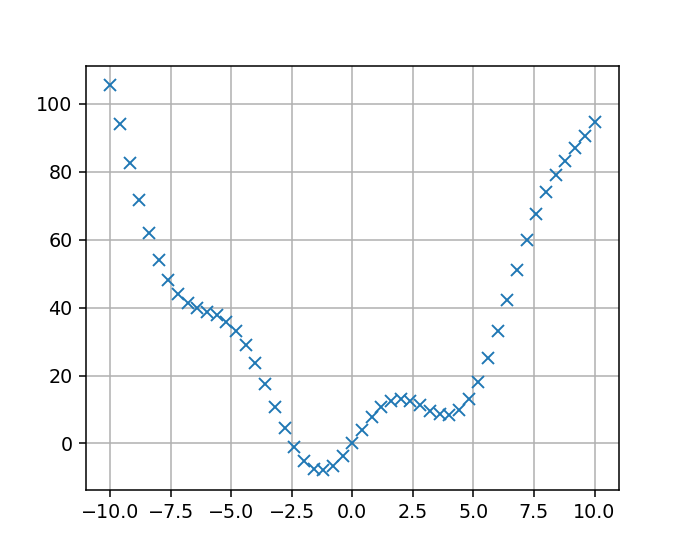

In [24]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y, 'x')
plt.grid('on')
plt.show()

In [25]:
y_noise = f(x) + 5*np.random.randn(x.size)  # Add some random noise
y_noise

array([105.921412  ,  92.99701564,  81.05137241,  81.56003988,
        59.47292825,  53.27850175,  39.70349161,  40.95268365,
        45.89560087,  51.31496703,  39.14116262,  44.55337533,
        32.18691164,  39.93454339,  35.38426941,  27.57988732,
        11.1359276 ,   9.02050262,   2.92543364,   2.05137706,
        -3.50159546,   0.50458403, -11.02889595,  -4.71987847,
         6.7292942 ,  -0.22768857,  12.07675324,   8.75341374,
        11.96887363,  18.49779309,  15.71738949,  15.77443136,
        17.57888609,   9.68508578,   8.7116707 ,   9.50753178,
         6.68563302,  12.27941924,  11.24239297,  15.77213764,
        36.83110165,  45.17447082,  58.11500824,  58.39166648,
        71.3456035 ,  79.34014409,  77.23543858,  82.74088553,
        88.00916167,  92.96686285, 101.68299619])

<IPython.core.display.Javascript object>


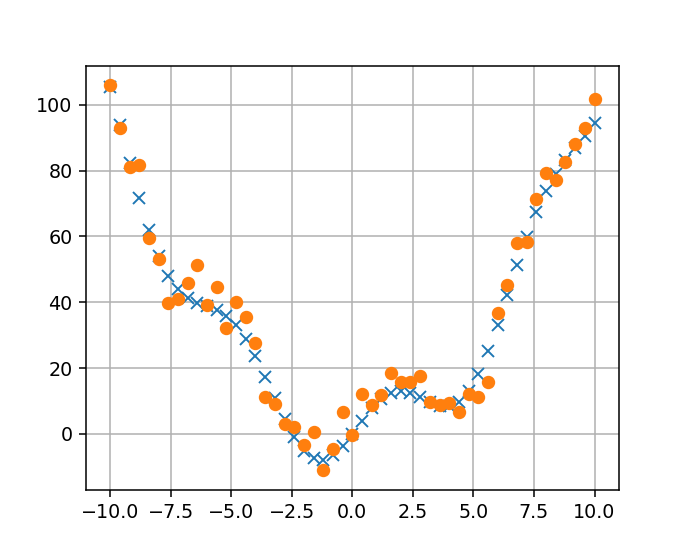

In [26]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y, 'x')
plt.plot(x, y_noise, 'o')
plt.grid('on')
plt.show()

- Fit a function $f_2(x)=ax^2+b\sin(x)$ by determining the optimal values of the coefficients `a` and `b`.

In [27]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

In [28]:
guess = [2, 2]  # Initial guess for a and b, respectively
params, cov = opt.curve_fit(f2, x, y_noise, guess)
params

array([ 1.02134163, 11.76959182])

In [29]:
a = params[0]
b = params[1]
y_fit = f2(x, a, b)
y_fit

array([108.53706915,  96.17859943,  83.82303203,  72.20845901,
        62.0075849 ,  53.72152142,  47.60067294,  43.60520316,
        41.41132439,  40.46241649,  40.05690495,  39.45902409,
        38.0149783 ,  35.25616193,  30.97314189,  25.2487225 ,
        18.44487248,  11.14557811,   4.06464457,  -2.06699815,
        -6.61669305,  -9.14993874,  -9.49898766,  -7.78932974,
        -4.41988028,   0.        ,   4.7467096 ,   9.09664702,
        12.44045155,  14.37920787,  14.78742607,  13.8328537 ,
        11.94999215,   9.77149842,   8.0283025 ,   7.43420958,
         8.57320592,  11.80726026,  17.21917691,  24.59952277,
        33.47969222,  43.20588962,  53.04234931,  62.28749676,
        70.38471185,  77.01020688,  82.12414555,  85.97693223,
        89.06967865,  92.07508932,  95.73125632])

<IPython.core.display.Javascript object>


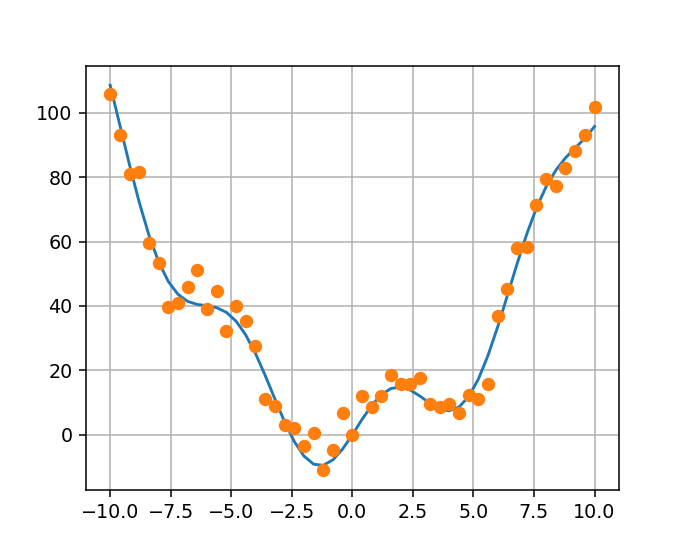

In [30]:
fig = plt.figure(figsize=(5, 4), dpi=80)
plt.plot(x, y_fit)
plt.plot(x, y_noise, 'o')
plt.grid('on')
plt.show()

### Course Materials on YouTube and GitHub

- Course videos are hosted by YouTube ( http://youtube.com/yongtwang ).
- Course documents (Jupyter Notebooks and Python source code) are hosted by GitHub ( http://github.com/yongtwang ).